In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from imblearn.combine import SMOTEENN
from sklearn.pipeline import Pipeline


In [ ]:
df = pd.read_csv('telchurn.csv')


In [ ]:
print(df.shape)
print(df.info())
print(df.describe())
print(df.isnull().sum())


(7043, 21)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null

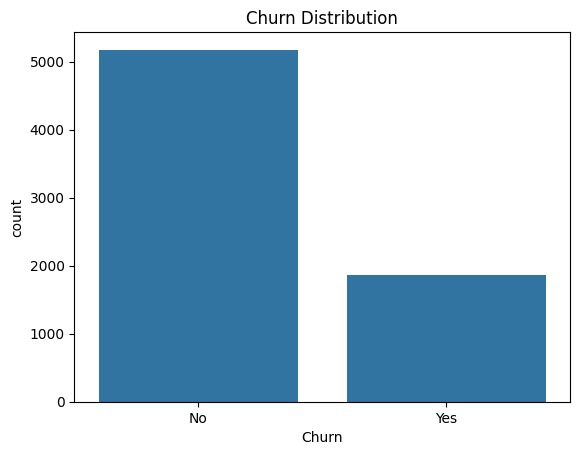

Churn
No     0.73463
Yes    0.26537
Name: proportion, dtype: float64


In [ ]:
sns.countplot(data=df, x='Churn')
plt.title('Churn Distribution')
plt.show()

print(df['Churn'].value_counts(normalize=True))


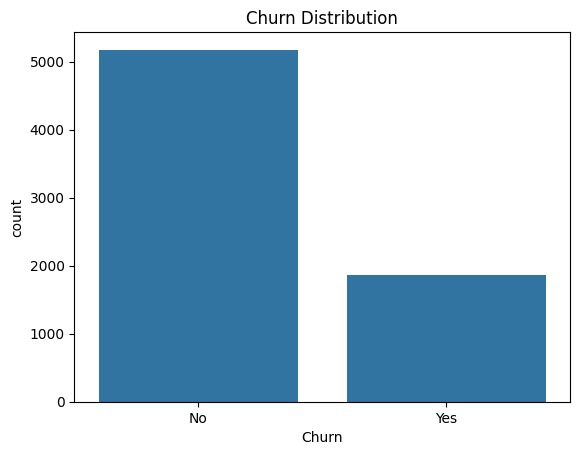

Churn
No     0.73463
Yes    0.26537
Name: proportion, dtype: float64


In [ ]:
sns.countplot(data=df, x='Churn')
plt.title('Churn Distribution')
plt.show()

print(df['Churn'].value_counts(normalize=True))


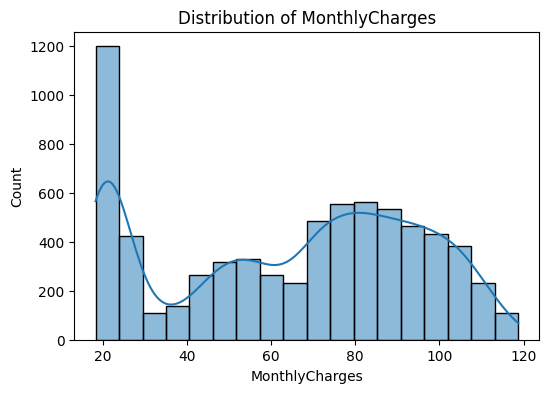

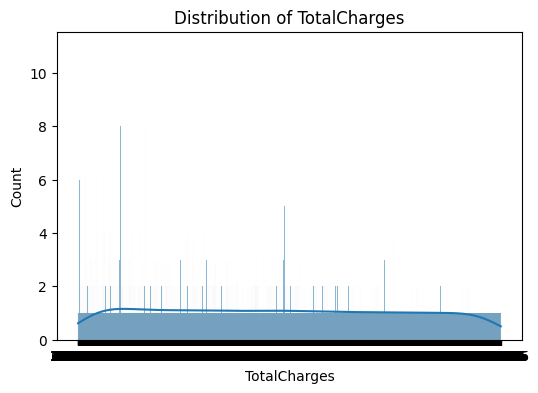

In [ ]:
num_cols = ['MonthlyCharges', 'TotalCharges']
for col in num_cols:
    plt.figure(figsize=(6, 4))
    sns.histplot(df[col], kde=True)
    plt.title(f'Distribution of {col}')
    plt.show()


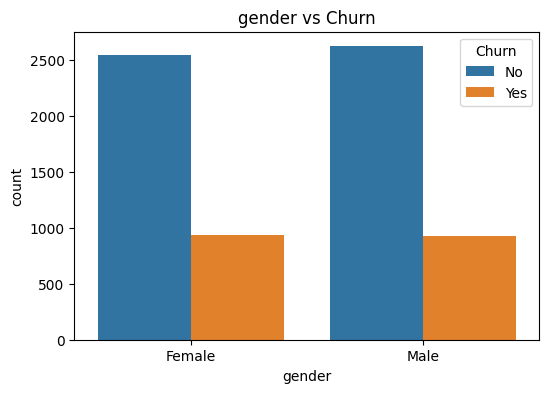

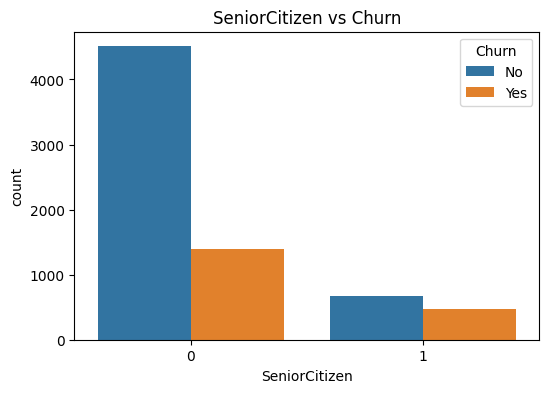

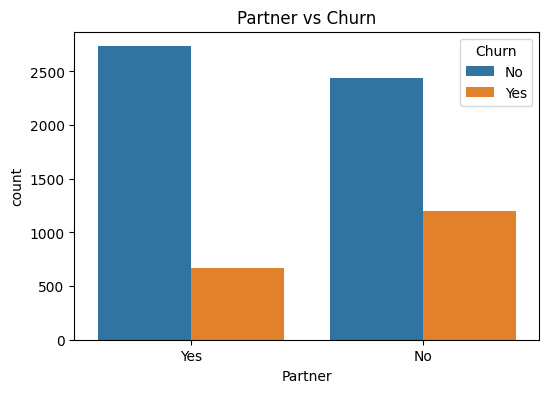

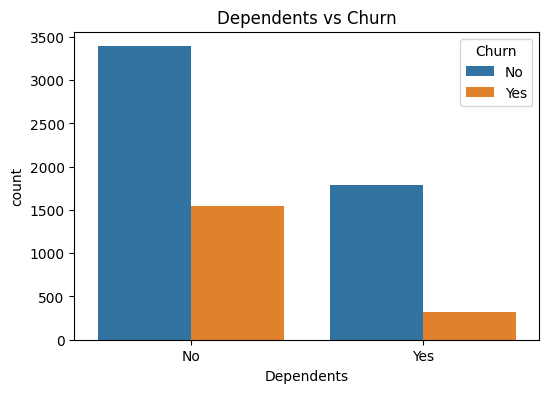

In [ ]:
cat_cols = ['gender', 'SeniorCitizen', 'Partner', 'Dependents']

for col in cat_cols:
    plt.figure(figsize=(6, 4))
    sns.countplot(data=df, x=col, hue='Churn')
    plt.title(f'{col} vs Churn')
    plt.show()


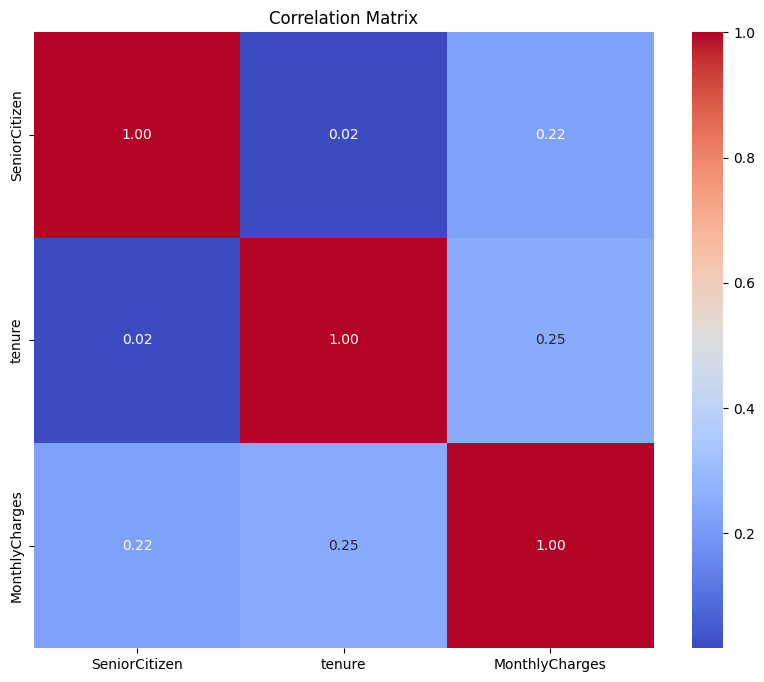

In [ ]:
plt.figure(figsize=(10,8))
corr = df.corr(numeric_only=True)
sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()


In [ ]:
# Drop unnecessary columns
if 'Unnamed: 0' in df.columns:
    df = df.drop('Unnamed: 0', axis=1)
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')
df['TotalCharges'] = df['TotalCharges'].fillna(df['TotalCharges'].mean())

# Convert categorical columns to dummy variables
categorical = df.select_dtypes('object').columns.drop('Churn')
df = pd.get_dummies(df, columns=categorical, drop_first=True)
df['Churn'] = df['Churn'].replace({'No': 0, 'Yes': 1}) if df['Churn'].dtype == 'object' else df['Churn']


/tmp/ipython-input-1550880437.py:10: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df['Churn'] = df['Churn'].replace({'No': 0, 'Yes': 1}) if df['Churn'].dtype == 'object' else df['Churn']


In [ ]:
X = df.drop('Churn', axis=1)
y = df['Churn']
df.head()





,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn,customerID_0003-MKNFE,customerID_0004-TLHLJ,customerID_0011-IGKFF,customerID_0013-EXCHZ,customerID_0013-MHZWF,...,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,1,29.85,29.85,0,False,False,False,False,False,...,False,False,False,False,False,False,True,False,True,False
1,0,34,56.95,1889.50,0,False,False,False,False,False,...,False,False,False,False,True,False,False,False,False,True
2,0,2,53.85,108.15,1,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,True
3,0,45,42.30,1840.75,0,False,False,False,False,False,...,False,False,False,False,True,False,False,False,False,False
4,0,2,70.70,151.65,1,False,False,False,False,False,...,False,False,False,False,False,False,True,False,True,False


Best threshold: 0.5000000000000002
Best F1-score: 0.612691466083151

Classification Report:
               precision    recall  f1-score   support

           0       0.89      0.75      0.81      1552
           1       0.52      0.75      0.61       561

    accuracy                           0.75      2113
   macro avg       0.71      0.75      0.71      2113
weighted avg       0.79      0.75      0.76      2113



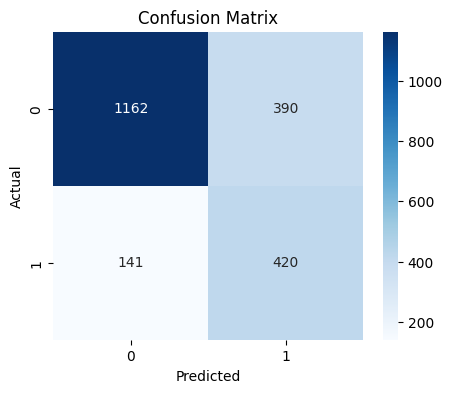

In [43]:
import numpy as np
from sklearn.metrics import f1_score, classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# y_probs = predicted probabilities for class 1 from your model
# y_test = actual labels

best_thresh = 0.5
best_f1 = 0

# Try thresholds from 0.3 to 0.8
for thresh in np.arange(0.3, 0.81, 0.01):
    # Convert probabilities to 0/1 based on threshold
    y_pred_thresh = (y_probs >= thresh).astype(int)

    # Compute F1-score
    f1 = f1_score(y_test, y_pred_thresh)

    # Update best threshold if F1 improves
    if f1 > best_f1:
        best_f1 = f1
        best_thresh = thresh

# Final predictions using best threshold
y_pred = (y_probs >= best_thresh).astype(int)

# Evaluation
print("Best threshold:", best_thresh)
print("Best F1-score:", best_f1)
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(5,4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()


In [45]:
from sklearn.metrics import accuracy_score

# y_test → true labels
# y_pred → model predictions
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)        # e.g., 0.72
print("Accuracy (%):", accuracy*100)  # e.g., 72%


Accuracy: 0.7486985328916232
Accuracy (%): 74.86985328916232


In [46]:
import pickle

# Assume your trained pipeline is stored in 'best_model'
# Save the pipeline to a file
filename = 'churn_pipeline_model.sav'
with open(filename, 'wb') as file:
    pickle.dump(best_model, file)

print("Model saved successfully!")


Model saved successfully!


In [47]:
# Load the saved model
with open('churn_pipeline_model.sav', 'rb') as file:
    loaded_model = pickle.load(file)

# Predict on new data
y_pred_loaded = loaded_model.predict(X_test)

# Evaluate
from sklearn.metrics import accuracy_score, classification_report
print("Accuracy:", accuracy_score(y_test, y_pred_loaded))
print(classification_report(y_test, y_pred_loaded))


Accuracy: 0.7486985328916232
              precision    recall  f1-score   support

           0       0.89      0.75      0.81      1552
           1       0.52      0.75      0.61       561

    accuracy                           0.75      2113
   macro avg       0.71      0.75      0.71      2113
weighted avg       0.79      0.75      0.76      2113



In [48]:
import pickle

# Save model into the churn folder
with open(r"C:\Users\user\Desktop\churn\churn_pipeline_model.sav", "wb") as f:
    pickle.dump(pipeline, f)
